In [9]:
# Split the dataset into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a function to train and evaluate a model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    import time
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))
    train_time = time.time() - start_time
    train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    params = model.count_params()
    print('Test accuracy:', test_acc*100)
    
    # Visualize the cross-entropy loss and classification accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Cross-Entropy Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Classification Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    
    return train_time, train_loss, train_acc, test_acc, params

# Implement the VGG (1 block) model

Epoch 1/10
18/18 [==============================] - 5s 253ms/step - loss: 450.4406 - accuracy: 0.6163 - val_loss: 414.2168 - val_accuracy: 0.6591
Epoch 2/10
18/18 [==============================] - 4s 249ms/step - loss: 39.9663 - accuracy: 0.8837 - val_loss: 344.2158 - val_accuracy: 0.4318
Epoch 3/10
18/18 [==============================] - 5s 250ms/step - loss: 30.4070 - accuracy: 0.8837 - val_loss: 66.4331 - val_accuracy: 0.7955
Epoch 4/10
18/18 [==============================] - 5s 251ms/step - loss: 31.8700 - accuracy: 0.9012 - val_loss: 56.2834 - val_accuracy: 0.7955
Epoch 5/10
18/18 [==============================] - 5s 253ms/step - loss: 4.6083 - accuracy: 0.9767 - val_loss: 77.8428 - val_accuracy: 0.7500
Epoch 6/10
18/18 [==============================] - 4s 244ms/step - loss: 0.9572 - accuracy: 0.9884 - val_loss: 152.2206 - val_accuracy: 0.6136
Epoch 7/10
18/18 [==============================] - 4s 246ms/step - loss: 0.9410 - accuracy: 0.9767 - val_loss: 74.0591 - val_accuracy

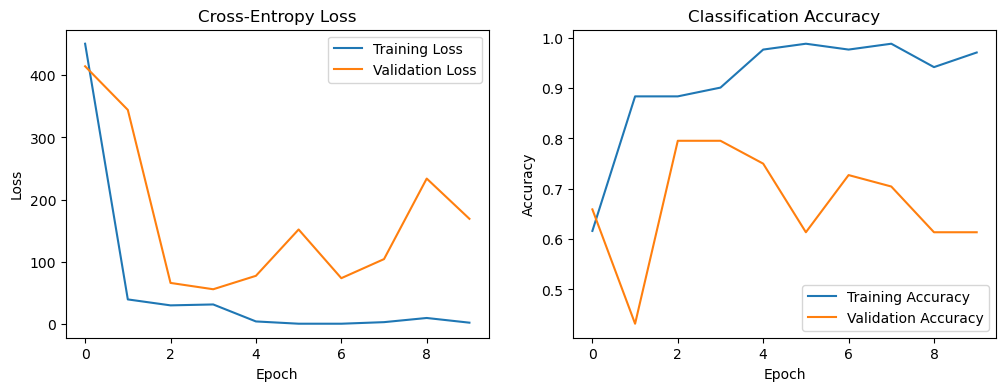

In [10]:

model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model1_train_time, model1_train_loss, model1_train_acc, model1_test_acc, model1_params = train_and_evaluate(model1, X_train, y_train, X_test, y_test)

# Implement the VGG (3 blocks) model

Epoch 1/10
18/18 [==============================] - 5s 216ms/step - loss: 56.9652 - accuracy: 0.5174 - val_loss: 0.6523 - val_accuracy: 0.6591
Epoch 2/10
18/18 [==============================] - 4s 207ms/step - loss: 0.5726 - accuracy: 0.7209 - val_loss: 0.8677 - val_accuracy: 0.4318
Epoch 3/10
18/18 [==============================] - 4s 210ms/step - loss: 0.3136 - accuracy: 0.8721 - val_loss: 0.9400 - val_accuracy: 0.5000
Epoch 4/10
18/18 [==============================] - 3s 184ms/step - loss: 0.1979 - accuracy: 0.9186 - val_loss: 1.7438 - val_accuracy: 0.4545
Epoch 5/10
18/18 [==============================] - 3s 183ms/step - loss: 0.1058 - accuracy: 0.9593 - val_loss: 1.5601 - val_accuracy: 0.4773
Epoch 6/10
18/18 [==============================] - 3s 183ms/step - loss: 0.0855 - accuracy: 0.9826 - val_loss: 3.4976 - val_accuracy: 0.5455
Epoch 7/10
18/18 [==============================] - 3s 186ms/step - loss: 0.1290 - accuracy: 0.9593 - val_loss: 1.4745 - val_accuracy: 0.5682
Epoch

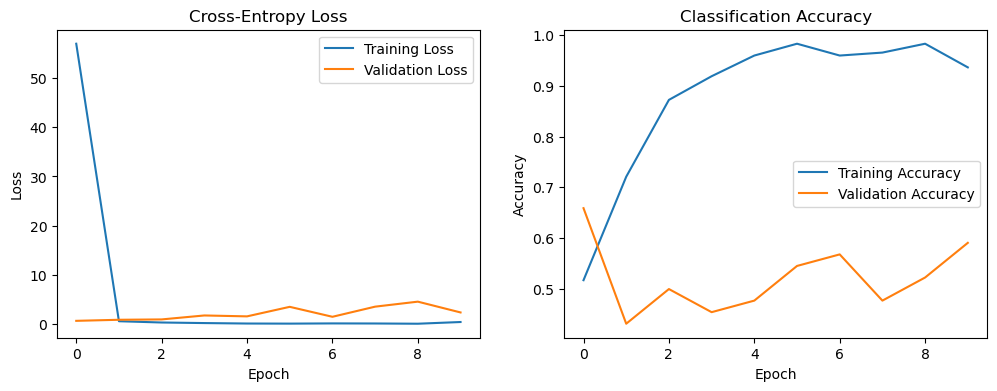

In [11]:

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model2_train_time, model2_train_loss, model2_train_acc, model2_test_acc, model2_params = train_and_evaluate(model2, X_train, y_train, X_test, y_test)

# Implement the VGG (3 blocks) with data augmentation

Epoch 1/10
18/18 [==============================] - 4s 201ms/step - loss: 126.0651 - accuracy: 0.5000 - val_loss: 0.7578 - val_accuracy: 0.6591
Epoch 2/10
18/18 [==============================] - 4s 197ms/step - loss: 0.5786 - accuracy: 0.7733 - val_loss: 1.1167 - val_accuracy: 0.4773
Epoch 3/10
18/18 [==============================] - 4s 210ms/step - loss: 0.3407 - accuracy: 0.8605 - val_loss: 1.0373 - val_accuracy: 0.6136
Epoch 4/10
18/18 [==============================] - 4s 205ms/step - loss: 0.1722 - accuracy: 0.9360 - val_loss: 2.0288 - val_accuracy: 0.4773
Epoch 5/10
18/18 [==============================] - 4s 211ms/step - loss: 0.3118 - accuracy: 0.8779 - val_loss: 1.0557 - val_accuracy: 0.4545
Epoch 6/10
18/18 [==============================] - 4s 202ms/step - loss: 0.1653 - accuracy: 0.9477 - val_loss: 2.3614 - val_accuracy: 0.5682
Epoch 7/10
18/18 [==============================] - 4s 203ms/step - loss: 0.1747 - accuracy: 0.9186 - val_loss: 0.9118 - val_accuracy: 0.6364
Epoc

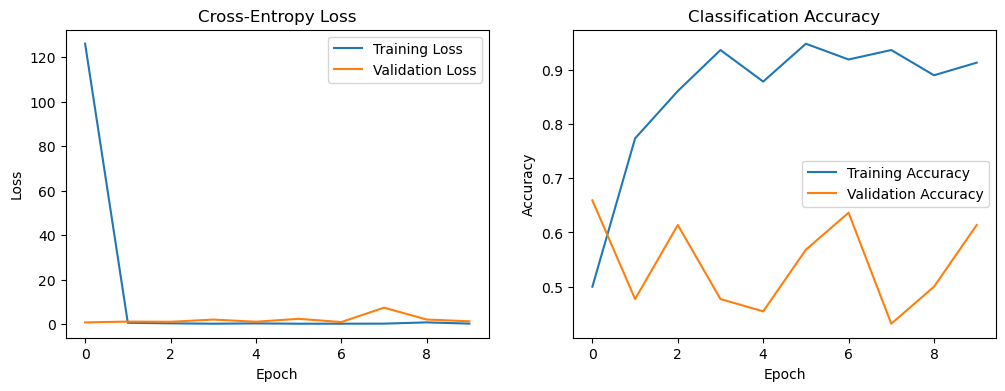

In [12]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model3_train_time, model3_train_loss, model3_train_acc, model3_test_acc, model3_params = train_and_evaluate(model3, X_train, y_train, X_test, y_test)

# Implement the transfer learning with VGG16 (tuning all layers)

Epoch 1/10
18/18 [==============================] - 43s 2s/step - loss: 16.5504 - accuracy: 0.5116 - val_loss: 0.7074 - val_accuracy: 0.4091
Epoch 2/10
18/18 [==============================] - 41s 2s/step - loss: 0.7082 - accuracy: 0.5465 - val_loss: 0.7071 - val_accuracy: 0.4318
Epoch 3/10
18/18 [==============================] - 38s 2s/step - loss: 0.7171 - accuracy: 0.4709 - val_loss: 0.7119 - val_accuracy: 0.3864
Epoch 4/10
18/18 [==============================] - 39s 2s/step - loss: 0.6968 - accuracy: 0.4942 - val_loss: 0.7118 - val_accuracy: 0.3864
Epoch 5/10
18/18 [==============================] - 53s 3s/step - loss: 0.6917 - accuracy: 0.5523 - val_loss: 0.7155 - val_accuracy: 0.3864
Epoch 6/10
18/18 [==============================] - 52s 3s/step - loss: 0.6832 - accuracy: 0.5581 - val_loss: 0.6808 - val_accuracy: 0.6136
Epoch 7/10
18/18 [==============================] - 52s 3s/step - loss: 0.6802 - accuracy: 0.5407 - val_loss: 0.6779 - val_accuracy: 0.6136
Epoch 8/10
18/18 [=

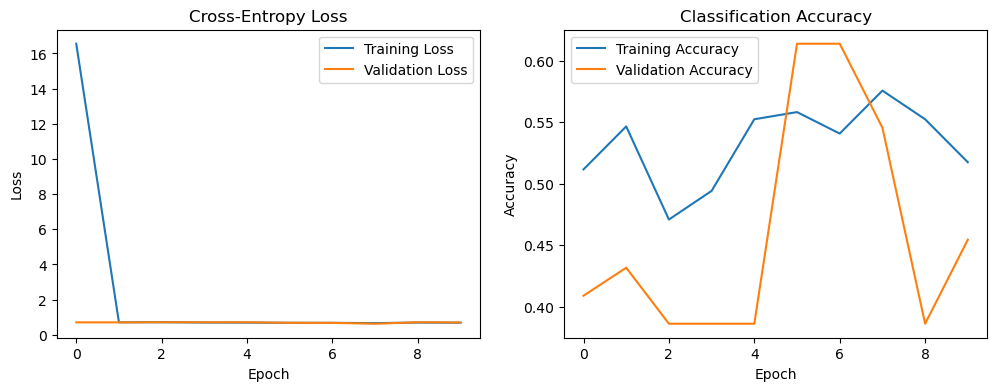

In [13]:

vgg16 = VGG16(include_top=False, input_shape=(200, 200, 3))
for layer in vgg16.layers:
    layer.trainable = True
model4 = Sequential()
model4.add(vgg16)
model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))
model4.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model4_train_time, model4_train_loss, model4_train_acc, model4_test_acc, model4_params = train_and_evaluate(model4, X_train, y_train, X_test, y_test)

# Implement the transfer learning with VGG16 (tuning only final layers)

Epoch 1/10
18/18 [==============================] - 16s 873ms/step - loss: 9.5954 - accuracy: 0.8314 - val_loss: 0.8473 - val_accuracy: 0.9091
Epoch 2/10
18/18 [==============================] - 15s 814ms/step - loss: 3.0970 - accuracy: 0.9302 - val_loss: 2.5107 - val_accuracy: 0.9091
Epoch 3/10
18/18 [==============================] - 15s 815ms/step - loss: 1.3172 - accuracy: 0.9651 - val_loss: 2.4226 - val_accuracy: 0.9545
Epoch 4/10
18/18 [==============================] - 14s 811ms/step - loss: 0.6416 - accuracy: 0.9767 - val_loss: 1.9700 - val_accuracy: 0.9545
Epoch 5/10
18/18 [==============================] - 14s 804ms/step - loss: 0.4318 - accuracy: 0.9884 - val_loss: 3.3178 - val_accuracy: 0.8864
Epoch 6/10
18/18 [==============================] - 14s 807ms/step - loss: 0.2344 - accuracy: 0.9826 - val_loss: 1.1798 - val_accuracy: 0.9545
Epoch 7/10
18/18 [==============================] - 18s 991ms/step - loss: 0.6234 - accuracy: 0.9767 - val_loss: 4.3615 - val_accuracy: 0.9091

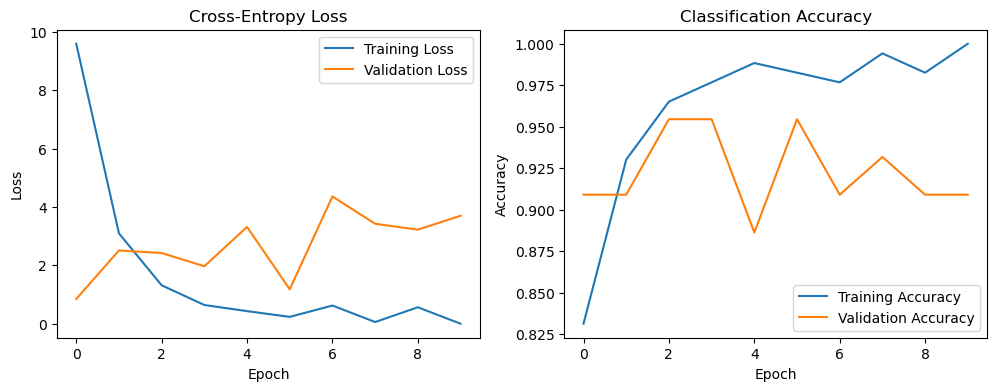

In [14]:

vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
for layer in vgg16.layers:
    layer.trainable = False
model5 = Sequential()
model5.add(vgg16)
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))
model5.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model5_train_time, model5_train_loss, model5_train_acc, model5_test_acc, model5_params = train_and_evaluate(model5, X_train, y_train, X_test, y_test)

# Create the comparison table

In [15]:

comparison_table = pd.DataFrame({
    'Model': ['VGG (1 block)', 'VGG (3 blocks)', 'VGG (3 blocks) with data augmentation', 'Transfer learning with VGG16 (tuning all layers)', 'Transfer learning with VGG16 (tuning only final layers)'],
    'Training Time': [model1_train_time, model2_train_time, model3_train_time, model4_train_time, model5_train_time],
    'Training Loss': [model1_train_loss, model2_train_loss, model3_train_loss, model4_train_loss, model5_train_loss],
    'Training Accuracy': [model1_train_acc, model2_train_acc, model3_train_acc, model4_train_acc, model5_train_acc],
    'Testing Accuracy': [model1_test_acc, model2_test_acc, model3_test_acc, model4_test_acc, model5_test_acc],
    'Number of Parameters': [model1_params, model2_params, model3_params, model4_params, model5_params]
})

print(comparison_table)

                                               Model  Training Time  \
0                                      VGG (1 block)      45.456653   
1                                     VGG (3 blocks)      35.361516   
2              VGG (3 blocks) with data augmentation      37.373068   
3   Transfer learning with VGG16 (tuning all layers)     476.545825   
4  Transfer learning with VGG16 (tuning only fina...     154.218082   

   Training Loss  Training Accuracy  Testing Accuracy  Number of Parameters  
0   3.762555e-01           0.976744          0.613636              20073473  
1   1.016413e+00           0.767442          0.590909               8760641  
2   1.115014e-01           0.982558          0.613636               8760641  
3   6.703792e-01           0.581395          0.454545              17074241  
4   7.078467e-09           1.000000          0.909091              17074241  


# Set up Tensorboard

In [16]:

from tensorboard import program
tb = program.TensorBoard()
tb.configure(argv=[None, '--logdir', 'logs'])
url = tb.launch()
print(f'Tensorboard is running at {url}')

# Log the training loss, training accuracy, and testing accuracy
import tensorflow as tf
log_dir = 'logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Tensorboard is running at http://localhost:6006/
Epoch 1/10
6/6 [==============================] - ETA: 0s - loss: 0.5625 - accuracy: 0.9767

6/6 [==============================] - 8s 2s/step - loss: 0.5625 - accuracy: 0.9767 - val_loss: 153.7759 - val_accuracy: 0.7045
Epoch 2/10
6/6 [==============================] - 5s 968ms/step - loss: 1.8997e-06 - accuracy: 1.0000 - val_loss: 125.9870 - val_accuracy: 0.7500
Epoch 3/10
6/6 [==============================] - 5s 831ms/step - loss: 1.0960 - accuracy: 0.9884 - val_loss: 218.7098 - val_accuracy: 0.5909
Epoch 4/10
6/6 [==============================] - 4s 821ms/step - loss: 1.7187 - accuracy: 0.9942 - val_loss: 156.0868 - val_accuracy: 0.6818
Epoch 5/10
6/6 [==============================] - 4s 728ms/step - loss: 1.1491e-09 - accuracy: 1.0000 - val_loss: 135.8889 - val_accuracy: 0.7955
Epoch 6/10
6/6 [==============================] - 4s 714ms/step - loss: 0.8015 - accuracy: 0.9942 - val_loss: 137.9520 - val_accuracy: 0.8182
Epoch 7/10
6/6 [==============================] - 4s 702ms/step - loss: 1.7686e-21 - accuracy: 1.0000 - val_loss: 147.3303 - val_accuracy: 0.7500
Epoch 8/

In [17]:
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
2/6 [=========>....................] - ETA: 3s - loss: 0.5134 - accuracy: 0.8281

6/6 [==============================] - 9s 2s/step - loss: 0.5136 - accuracy: 0.7965 - val_loss: 1.4489 - val_accuracy: 0.6591
Epoch 2/10
6/6 [==============================] - 5s 838ms/step - loss: 0.2376 - accuracy: 0.9419 - val_loss: 1.4891 - val_accuracy: 0.5909
Epoch 3/10
6/6 [==============================] - 4s 719ms/step - loss: 0.1233 - accuracy: 0.9709 - val_loss: 1.9547 - val_accuracy: 0.6136
Epoch 4/10
6/6 [==============================] - 4s 723ms/step - loss: 0.0467 - accuracy: 0.9884 - val_loss: 2.9234 - val_accuracy: 0.6364
Epoch 5/10
6/6 [==============================] - 4s 702ms/step - loss: 0.0656 - accuracy: 0.9767 - val_loss: 2.6967 - val_accuracy: 0.5682
Epoch 6/10
6/6 [==============================] - 4s 700ms/step - loss: 0.1049 - accuracy: 0.9826 - val_loss: 3.0405 - val_accuracy: 0.6818
Epoch 7/10
6/6 [==============================] - 4s 726ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 3.9266 - val_accuracy: 0.6591
Epoch 8/10
6/6 [==================

In [18]:

model3.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
6/6 [==============================] - 5s 788ms/step - loss: 0.6892 - accuracy: 0.6512 - val_loss: 1.4208 - val_accuracy: 0.5682
Epoch 2/10
1/6 [====>.........................] - ETA: 1s - loss: 0.6840 - accuracy: 0.8333

6/6 [==============================] - 5s 876ms/step - loss: 0.6870 - accuracy: 0.6105 - val_loss: 1.5993 - val_accuracy: 0.6136
Epoch 3/10
6/6 [==============================] - 4s 713ms/step - loss: 0.6711 - accuracy: 0.6977 - val_loss: 2.1882 - val_accuracy: 0.5909
Epoch 4/10
6/6 [==============================] - 4s 697ms/step - loss: 0.6423 - accuracy: 0.6802 - val_loss: 9.5043 - val_accuracy: 0.4773
Epoch 5/10
6/6 [==============================] - 4s 737ms/step - loss: 0.6191 - accuracy: 0.6221 - val_loss: 6.6528 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 4s 704ms/step - loss: 0.5659 - accuracy: 0.7326 - val_loss: 37.8513 - val_accuracy: 0.5455
Epoch 7/10
6/6 [==============================] - 4s 723ms/step - loss: 0.5459 - accuracy: 0.7267 - val_loss: 71.3068 - val_accuracy: 0.5000
Epoch 8/10
6/6 [==============================] - 4s 688ms/step - loss: 0.5094 - accuracy: 0.7442 - val_loss: 27.3133 - val_accuracy: 0.5000
Epoch 9/10
6/6 [============

In [19]:

model4.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
1/6 [====>.........................] - ETA: 46s - loss: 0.6778 - accuracy: 0.5312

6/6 [==============================] - 56s 9s/step - loss: 0.6706 - accuracy: 0.5756 - val_loss: 0.7165 - val_accuracy: 0.4545
Epoch 2/10
6/6 [==============================] - 50s 8s/step - loss: 0.6519 - accuracy: 0.5988 - val_loss: 0.6580 - val_accuracy: 0.5909
Epoch 3/10
6/6 [==============================] - 51s 8s/step - loss: 0.6432 - accuracy: 0.6453 - val_loss: 0.6408 - val_accuracy: 0.6136
Epoch 4/10
6/6 [==============================] - 50s 8s/step - loss: 0.6189 - accuracy: 0.6512 - val_loss: 0.6710 - val_accuracy: 0.5909
Epoch 5/10
6/6 [==============================] - 51s 8s/step - loss: 0.6272 - accuracy: 0.6744 - val_loss: 0.6296 - val_accuracy: 0.6364
Epoch 6/10
6/6 [==============================] - 51s 9s/step - loss: 0.6414 - accuracy: 0.6802 - val_loss: 0.6845 - val_accuracy: 0.5909
Epoch 7/10
6/6 [==============================] - 51s 9s/step - loss: 0.6512 - accuracy: 0.5640 - val_loss: 0.7255 - val_accuracy: 0.3864
Epoch 8/10
6/6 [=============================

In [20]:

model5.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/10
2/6 [=========>....................] - ETA: 9s - loss: 0.4454 - accuracy: 0.9844 

6/6 [==============================] - 16s 3s/step - loss: 0.2740 - accuracy: 0.9826 - val_loss: 3.7519 - val_accuracy: 0.9091
Epoch 2/10
6/6 [==============================] - 16s 3s/step - loss: 0.0080 - accuracy: 0.9942 - val_loss: 3.8558 - val_accuracy: 0.9091
Epoch 3/10
6/6 [==============================] - 17s 3s/step - loss: 0.3381 - accuracy: 0.9884 - val_loss: 3.3434 - val_accuracy: 0.9091
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.1766 - accuracy: 0.9884 - val_loss: 1.3966 - val_accuracy: 0.9091
Epoch 5/10
6/6 [==============================] - 16s 3s/step - loss: 0.0991 - accuracy: 0.9942 - val_loss: 0.9756 - val_accuracy: 0.9318
Epoch 6/10
6/6 [==============================] - 16s 3s/step - loss: 2.1288e-16 - accuracy: 1.0000 - val_loss: 1.2403 - val_accuracy: 0.9318
Epoch 7/10
6/6 [==============================] - 16s 3s/step - loss: 0.0492 - accuracy: 0.9942 - val_loss: 1.5835 - val_accuracy: 0.9318
Epoch 8/10
6/6 [=========================

# Create a MLP model with a comparable number of parameters as VGG16 and compare your performance with the other models in the table.

In [21]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))
print("Number of parameters in VGG16:", vgg16.count_params())

Number of parameters in VGG16: 14714688


In [22]:
# Create the MLP model
mlp_model = Sequential()
mlp_model.add(Flatten(input_shape=(200, 200, 3)))
mlp_model.add(Dense(128, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(64, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(28, activation='relu'))
mlp_model.add(Dropout(0.5))
mlp_model.add(Dense(1, activation='sigmoid'))
mlp_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Count the number of parameters in the MLP model
print("Number of parameters in MLP model:", mlp_model.count_params())

Number of parameters in MLP model: 15370233


Epoch 1/10
18/18 [==============================] - 3s 159ms/step - loss: 0.6876 - accuracy: 0.5349 - val_loss: 0.7021 - val_accuracy: 0.3864
Epoch 2/10
18/18 [==============================] - 3s 147ms/step - loss: 0.6917 - accuracy: 0.5291 - val_loss: 0.7025 - val_accuracy: 0.3864
Epoch 3/10
18/18 [==============================] - 3s 148ms/step - loss: 3.7452 - accuracy: 0.5291 - val_loss: 0.7021 - val_accuracy: 0.3864
Epoch 4/10
18/18 [==============================] - 3s 145ms/step - loss: 0.6881 - accuracy: 0.5349 - val_loss: 0.7020 - val_accuracy: 0.3864
Epoch 5/10
18/18 [==============================] - 3s 187ms/step - loss: 0.6920 - accuracy: 0.5291 - val_loss: 0.7025 - val_accuracy: 0.3864
Epoch 6/10
18/18 [==============================] - 3s 167ms/step - loss: 0.6927 - accuracy: 0.5291 - val_loss: 0.7029 - val_accuracy: 0.3864
Epoch 7/10
18/18 [==============================] - 3s 145ms/step - loss: 0.6920 - accuracy: 0.5291 - val_loss: 0.7036 - val_accuracy: 0.3864
Epoch 

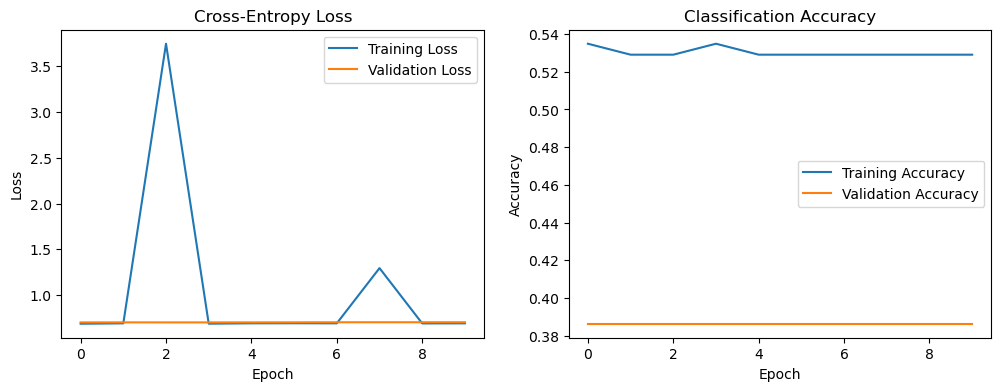

In [26]:
mlp_train_time, mlp_train_loss, mlp_train_acc, mlp_test_acc, mlp_params = train_and_evaluate(mlp_model, X_train, y_train, X_test, y_test)

In [30]:
# Save the complete comparison table
comparison_table = pd.DataFrame({
    'Model': ['VGG (1 block)', 'VGG (3 blocks)', 'VGG (3 blocks) with data augmentation', 'Transfer learning with VGG16 (tuning all layers)', 'Transfer learning with VGG16 (tuning only final layers)', 'MLP'],
    'Training Time': [model1_train_time, model2_train_time, model3_train_time, model4_train_time, model5_train_time, mlp_train_time],
    'Training Loss': [model1_train_loss, model2_train_loss, model3_train_loss, model4_train_loss, model5_train_loss, mlp_train_loss],
    'Training Accuracy': [model1_train_acc, model2_train_acc, model3_train_acc, model4_train_acc, model5_train_acc, mlp_train_acc],
    'Testing Accuracy': [model1_test_acc, model2_test_acc, model3_test_acc, model4_test_acc, model5_test_acc, mlp_test_acc],
    'Number of Parameters': [model1_params, model2_params, model3_params, model4_params, model5_params, mlp_params]
})

print(comparison_table)

                                               Model  Training Time  \
0                                      VGG (1 block)      45.456653   
1                                     VGG (3 blocks)      35.361516   
2              VGG (3 blocks) with data augmentation      37.373068   
3   Transfer learning with VGG16 (tuning all layers)     476.545825   
4  Transfer learning with VGG16 (tuning only fina...     154.218082   
5                                                MLP      29.091088   

   Training Loss  Training Accuracy  Testing Accuracy  Number of Parameters  
0   3.762555e-01           0.976744          0.613636              20073473  
1   1.016413e+00           0.767442          0.590909               8760641  
2   1.115014e-01           0.982558          0.613636               8760641  
3   6.703792e-01           0.581395          0.454545              17074241  
4   7.078467e-09           1.000000          0.909091              17074241  
5   6.915755e-01           0.52907

: 